In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.optimize import curve_fit 
from numpy import exp

In [2]:
data = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\Парсинг — копия.csv',sep=';')
data.head()

,csname,cnamer,newcopf,cdreg,Кол-во лет\n существования,"Финансовый результат\nза I полугодие 2024, тыс. руб","Финансовый результат\nза I полугодие 2023, тыс. руб","Итого источники капитала\nна 1.07.2024, тыс. руб",Изменение финансового результата,Рост капитала (да/нет)
0,"АКБ ""Абсолют Банк"" (ПАО)",АБСОЛЮТ БАНК,ПАО,22.04.1993,31,792060,3330563,46634535,-2538503,0
1,"ПАО АКБ ""АВАНГАРД""",АВАНГАРД,ПАО,09.06.1994,30,2319484,3815678,13954765,-1496194,0
2,"АО Банк ""Аверс""",АВЕРС,НПАО,25.09.1990,34,1883000,1510652,31302212,372348,1
3,"АО ""Авто Финанс Банк""",АВТО ФИНАНС БАНК,НПАО,26.04.1991,33,1448854,1303621,32236975,145233,1
4,"ООО ""АвтоКредитБанк""",АВТОКРЕДИТБАНК,ООО (Паевое),22.07.1992,32,66682,40254,964965,26428,1


In [3]:
data = data.rename(columns = {'Полное наименование':'full_name', 'Сокращенное наименование':'short_name', 'ОПФ':'org_form', 'Дата регистрации':'date_reg',\
                              'Кол-во лет\n существования':'n_years', \
                              'Финансовый результат\nза I полугодие 2024, тыс. руб':'FR_2024H1_thousand_rubles',\
                             'Финансовый результат\nза I полугодие 2023, тыс. руб':'FR_2023H1_thousand_rubles',\
                             'Итого источники капитала\nна 1.07.2024, тыс. руб':'cap_sources_total_07_2024',\
                             'Изменение финансового результата':'changing_FR',
                             'Рост капитала (да/нет)':'cap_growth'})
data.head()

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth
0,"АКБ ""Абсолют Банк"" (ПАО)",АБСОЛЮТ БАНК,ПАО,22.04.1993,31,792060,3330563,46634535,-2538503,0
1,"ПАО АКБ ""АВАНГАРД""",АВАНГАРД,ПАО,09.06.1994,30,2319484,3815678,13954765,-1496194,0
2,"АО Банк ""Аверс""",АВЕРС,НПАО,25.09.1990,34,1883000,1510652,31302212,372348,1
3,"АО ""Авто Финанс Банк""",АВТО ФИНАНС БАНК,НПАО,26.04.1991,33,1448854,1303621,32236975,145233,1
4,"ООО ""АвтоКредитБанк""",АВТОКРЕДИТБАНК,ООО (Паевое),22.07.1992,32,66682,40254,964965,26428,1


In [4]:
data.describe().map(lambda x: f"{x:0.3f}")

,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth
count,315.000,315.000,315.000,315.000,315.000,315.000
mean,29.470,4270081.257,5031516.959,53115930.705,-761435.702,0.683
std,5.498,27543783.628,39833423.890,423052325.177,13897037.080,0.466
min,1.000,-13597677.000,-11993156.000,-1277641218.000,-226878659.000,0.000
25%,30.000,17947.000,9325.500,839516.500,-39590.000,0.000
50%,31.000,144539.000,106139.000,3041019.000,39549.000,1.000
75%,33.000,927223.000,687041.000,13427133.500,289708.000,1.000
max,34.000,445416341.000,672295000.000,6928871769.000,39895603.000,1.000


In [5]:
df = data.copy()
df.head()

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth
0,"АКБ ""Абсолют Банк"" (ПАО)",АБСОЛЮТ БАНК,ПАО,22.04.1993,31,792060,3330563,46634535,-2538503,0
1,"ПАО АКБ ""АВАНГАРД""",АВАНГАРД,ПАО,09.06.1994,30,2319484,3815678,13954765,-1496194,0
2,"АО Банк ""Аверс""",АВЕРС,НПАО,25.09.1990,34,1883000,1510652,31302212,372348,1
3,"АО ""Авто Финанс Банк""",АВТО ФИНАНС БАНК,НПАО,26.04.1991,33,1448854,1303621,32236975,145233,1
4,"ООО ""АвтоКредитБанк""",АВТОКРЕДИТБАНК,ООО (Паевое),22.07.1992,32,66682,40254,964965,26428,1


In [6]:
data['FR_2024H1_thousand_rubles'].sum() - data['FR_2023H1_thousand_rubles'].sum()

-239852246

In [7]:
scaler = StandardScaler() 
list = pd.DataFrame(df['FR_2024H1_thousand_rubles']) 
list = scaler.fit_transform(list) 
df['FR_2024H1_thousand_rubles'] = list
list = pd.DataFrame(df['FR_2023H1_thousand_rubles']) 
list = scaler.fit_transform(list) 
df['FR_2023H1_thousand_rubles'] = list
list = pd.DataFrame(df['cap_sources_total_07_2024']) 
list = scaler.fit_transform(list) 
df['cap_sources_total_07_2024'] = list
df.head()

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth
0,"АКБ ""Абсолют Банк"" (ПАО)",АБСОЛЮТ БАНК,ПАО,22.04.1993,31,-0.126473,-0.042770,-0.015345,-2538503,0
1,"ПАО АКБ ""АВАНГАРД""",АВАНГАРД,ПАО,09.06.1994,30,-0.070931,-0.030572,-0.092715,-1496194,0
2,"АО Банк ""Аверс""",АВЕРС,НПАО,25.09.1990,34,-0.086803,-0.088530,-0.051645,372348,1
3,"АО ""Авто Финанс Банк""",АВТО ФИНАНС БАНК,НПАО,26.04.1991,33,-0.102590,-0.093736,-0.049432,145233,1
4,"ООО ""АвтоКредитБанк""",АВТОКРЕДИТБАНК,ООО (Паевое),22.07.1992,32,-0.152851,-0.125503,-0.123469,26428,1


Text(0, 0.5, 'FR_2024H1_thousand_rubles, std')

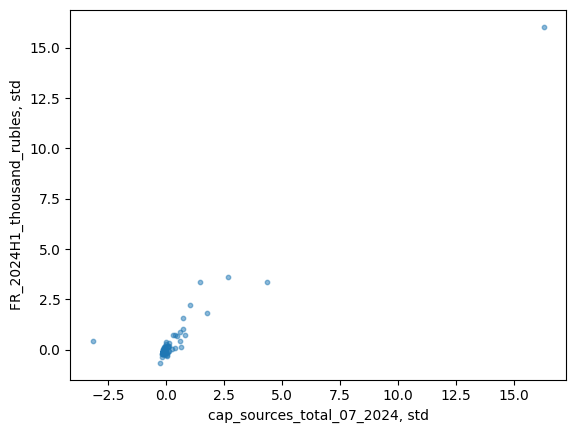

In [8]:
plt.scatter(data = df, x = 'cap_sources_total_07_2024', y = 'FR_2024H1_thousand_rubles', \
            s = 10, alpha = 0.5)
plt.xlabel("cap_sources_total_07_2024, std")
plt.ylabel("FR_2024H1_thousand_rubles, std")

###
Очистка от выбросов. Кластеризация очищенных данных


In [9]:
df['main_scatterplot_23'] = np.where((df['cap_sources_total_07_2024'] > -0.3)&(df['cap_sources_total_07_2024'] < 0.8)&(df['FR_2023H1_thousand_rubles'] > -0.5)&(df['FR_2023H1_thousand_rubles'] < 0.9),1,0)
df.head()

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth,main_scatterplot_23
0,"АКБ ""Абсолют Банк"" (ПАО)",АБСОЛЮТ БАНК,ПАО,22.04.1993,31,-0.126473,-0.042770,-0.015345,-2538503,0,1
1,"ПАО АКБ ""АВАНГАРД""",АВАНГАРД,ПАО,09.06.1994,30,-0.070931,-0.030572,-0.092715,-1496194,0,1
2,"АО Банк ""Аверс""",АВЕРС,НПАО,25.09.1990,34,-0.086803,-0.088530,-0.051645,372348,1,1
3,"АО ""Авто Финанс Банк""",АВТО ФИНАНС БАНК,НПАО,26.04.1991,33,-0.102590,-0.093736,-0.049432,145233,1,1
4,"ООО ""АвтоКредитБанк""",АВТОКРЕДИТБАНК,ООО (Паевое),22.07.1992,32,-0.152851,-0.125503,-0.123469,26428,1,1


In [10]:
0.8987*0.015345 - 0.063

-0.0492094485

In [11]:
df.query('main_scatterplot_23 == 1').count()

csname                       307
cnamer                       307
newcopf                      307
cdreg                        307
n_years                      307
FR_2024H1_thousand_rubles    307
FR_2023H1_thousand_rubles    307
cap_sources_total_07_2024    307
changing_FR                  307
cap_growth                   307
main_scatterplot_23          307
dtype: int64

In [12]:
df.describe().map(lambda x: f"{x:0.3f}")

,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth,main_scatterplot_23
count,315.000,315.000,315.000,315.000,315.000,315.000,315.000
mean,29.470,0.000,-0.000,0.000,-761435.702,0.683,0.975
std,5.498,1.002,1.002,1.002,13897037.080,0.466,0.158
min,1.000,-0.650,-0.428,-3.151,-226878659.000,0.000,0.000
25%,30.000,-0.155,-0.126,-0.124,-39590.000,0.000,1.000
50%,31.000,-0.150,-0.124,-0.119,39549.000,1.000,1.000
75%,33.000,-0.122,-0.109,-0.094,289708.000,1.000,1.000
max,34.000,16.042,16.778,16.279,39895603.000,1.000,1.000


In [13]:
'''
main_scatterplot_23 - введенный авторами показатель принадлежности к основной/рассматриваемой части данных в 2023 году:
если равен 0, то наблюдение является выбросом, 
иначе - не является
'''
for_clustering = df.query('main_scatterplot_23 == 1').iloc[:,6:8].reset_index().drop('index',axis = 1)
kmeans = KMeans(n_clusters = 4,random_state=1)
kmeans.fit(for_clustering)
for_clustering['cluster_23'] = kmeans.labels_
for_clustering.head()

,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,cluster_23
0,-0.042770,-0.015345,0
1,-0.030572,-0.092715,0
2,-0.088530,-0.051645,0
3,-0.093736,-0.049432,0
4,-0.125503,-0.123469,0


In [14]:
for_clustering.describe()

,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,cluster_23
count,307.000000,307.000000,307.000000
mean,-0.092576,-0.082363,0.201954
std,0.110978,0.123211,0.708212
min,-0.428077,-0.271543,0.000000
25%,-0.126316,-0.123787,0.000000
50%,-0.124133,-0.118926,0.000000
75%,-0.111629,-0.098753,0.000000
max,0.806398,0.741002,3.000000


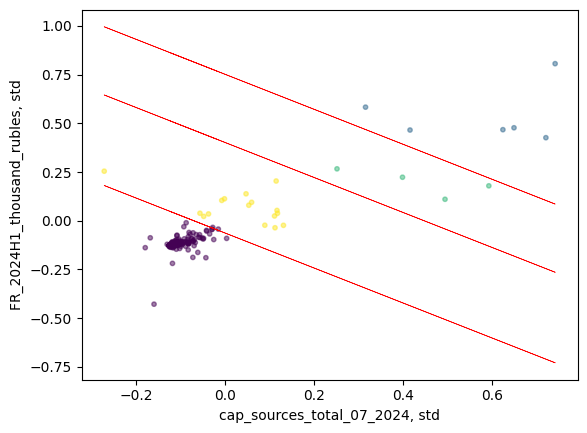

In [15]:
plt.scatter(data = for_clustering, x = 'cap_sources_total_07_2024', y = 'FR_2023H1_thousand_rubles', \
            c = for_clustering['cluster_23'], s = 10, alpha = 0.5)
#plt.xticks(np.arange(min(for_clustering['cap_sources_total_07_2024']), max(for_clustering['cap_sources_total_07_2024'])+1, 0.5))
#plt.yticks(np.arange(min(for_clustering['FR_2023H1_thousand_rubles']), max(for_clustering['FR_2023H1_thousand_rubles'])+1, 0.1))
slope, intercept = -0.8987, -0.063
line = slope * for_clustering['cap_sources_total_07_2024'] + intercept
plt.plot(for_clustering['cap_sources_total_07_2024'], line, color='red', linewidth=0.5)

slope1, intercept1 = -0.8987, 0.4017
line1 = slope1 * for_clustering['cap_sources_total_07_2024'] + intercept1
plt.plot(for_clustering['cap_sources_total_07_2024'], line1, color='red', linewidth=0.5)

slope2, intercept2 = -0.8987, 0.7517
line2 = slope2 * for_clustering['cap_sources_total_07_2024'] + intercept2
plt.plot(for_clustering['cap_sources_total_07_2024'], line2, color='red', linewidth=0.5)

#a, b = 0.78060017, -0.02828294
#trend = a * for_clustering['cap_sources_total_07_2024']+b
#plt.plot(for_clustering['cap_sources_total_07_2024'], trend, color='blue', linewidth=0.5)

plt.xlabel("cap_sources_total_07_2024, std")
plt.ylabel("FR_2024H1_thousand_rubles, std")
plt.show()

In [16]:
def test(x, a, b):
    return a * for_clustering['cap_sources_total_07_2024'] + b
param, param_cov = curve_fit(test, for_clustering['cap_sources_total_07_2024'], for_clustering['FR_2023H1_thousand_rubles'])
print(param)

[ 0.78060017 -0.02828294]


In [17]:
for_clustering['cluster_23'].value_counts()

cluster_23
0    281
3     16
1      6
2      4
Name: count, dtype: int64

In [18]:
#Расположим кластеры по порядку
#Уже сделано:

for_clustering.loc[for_clustering['cluster_23']==0,'cluster23'] = 1
for_clustering.loc[for_clustering['cluster_23']==3,'cluster23'] = 2
for_clustering.loc[for_clustering['cluster_23']==1,'cluster23'] = 3
for_clustering.loc[for_clustering['cluster_23']==2,'cluster23'] = 4

for_clustering.head()

,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,cluster_23,cluster23
0,-0.042770,-0.015345,0,1.0
1,-0.030572,-0.092715,0,1.0
2,-0.088530,-0.051645,0,1.0
3,-0.093736,-0.049432,0,1.0
4,-0.125503,-0.123469,0,1.0


In [19]:
for_clustering.query('cluster23 == 1').cap_sources_total_07_2024.max()

0.003358325099971812

In [20]:
#Уже сделано:
for_clustering = for_clustering.drop(['cluster_23'], axis = 1)

In [21]:
for_clustering.head()

,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,cluster23
0,-0.042770,-0.015345,1.0
1,-0.030572,-0.092715,1.0
2,-0.088530,-0.051645,1.0
3,-0.093736,-0.049432,1.0
4,-0.125503,-0.123469,1.0


### 
Работа отдельно с выбросами 



In [22]:
outliers = df.query('main_scatterplot_23 == 0').iloc[:,[1,6,7]].reset_index().drop('index',axis = 1)
outliers

,cnamer,FR_2023H1_thousand_rubles,cap_sources_total_07_2024
0,АЛЬФА-БАНК,1.025385,1.790512
1,ВТБ,3.574953,4.366416
2,ГАЗПРОМБАНК,2.755961,2.683990
3,ПРОМСВЯЗЬБАНК,1.299528,1.458539
4,РАЙФФАЙЗЕНБАНК,1.360960,1.039504
5,СБЕРБАНК РОССИИ,16.777999,16.278591
6,СОВКОМБАНК,1.449009,0.818499
7,ТРАСТ,0.176883,-3.150614


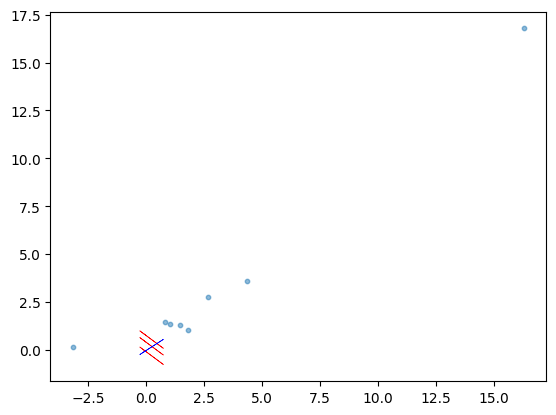

In [23]:
plt.scatter(data = outliers, x = 'cap_sources_total_07_2024', y = 'FR_2023H1_thousand_rubles', \
            s = 10, alpha = 0.5)

slope, intercept = -0.8987, -0.093
line = slope * for_clustering['cap_sources_total_07_2024'] + intercept
plt.plot(for_clustering['cap_sources_total_07_2024'], line, color='red', linewidth=0.5)

slope1, intercept1 = -0.8987, 0.4017
line1 = slope1 * for_clustering['cap_sources_total_07_2024'] + intercept1
plt.plot(for_clustering['cap_sources_total_07_2024'], line1, color='red', linewidth=0.5)

slope2, intercept2 = -0.8987, 0.7517
line2 = slope2 * for_clustering['cap_sources_total_07_2024'] + intercept2
plt.plot(for_clustering['cap_sources_total_07_2024'], line2, color='red', linewidth=0.5)

a, b = 0.78060017, -0.02828294
trend = a * for_clustering['cap_sources_total_07_2024']+b
plt.plot(for_clustering['cap_sources_total_07_2024'], trend, color='blue', linewidth=0.5)

plt.show()

In [24]:
outliers['cluster23'] = np.where((outliers['cap_sources_total_07_2024']<0),1,4)
outliers

,cnamer,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,cluster23
0,АЛЬФА-БАНК,1.025385,1.790512,4
1,ВТБ,3.574953,4.366416,4
2,ГАЗПРОМБАНК,2.755961,2.683990,4
3,ПРОМСВЯЗЬБАНК,1.299528,1.458539,4
4,РАЙФФАЙЗЕНБАНК,1.360960,1.039504,4
5,СБЕРБАНК РОССИИ,16.777999,16.278591,4
6,СОВКОМБАНК,1.449009,0.818499,4
7,ТРАСТ,0.176883,-3.150614,1


###
Присоединим столбец с номером кластера в исходную таблицу data



In [25]:
df

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth,main_scatterplot_23
0,"АКБ ""Абсолют Банк"" (ПАО)",АБСОЛЮТ БАНК,ПАО,22.04.1993,31,-0.126473,-0.042770,-0.015345,-2538503,0,1
1,"ПАО АКБ ""АВАНГАРД""",АВАНГАРД,ПАО,09.06.1994,30,-0.070931,-0.030572,-0.092715,-1496194,0,1
2,"АО Банк ""Аверс""",АВЕРС,НПАО,25.09.1990,34,-0.086803,-0.088530,-0.051645,372348,1,1
3,"АО ""Авто Финанс Банк""",АВТО ФИНАНС БАНК,НПАО,26.04.1991,33,-0.102590,-0.093736,-0.049432,145233,1,1
4,"ООО ""АвтоКредитБанк""",АВТОКРЕДИТБАНК,ООО (Паевое),22.07.1992,32,-0.152851,-0.125503,-0.123469,26428,1,1
...,...,...,...,...,...,...,...,...,...,...,...
310,ЮГ-Инвестбанк (ПАО),ЮГ-ИНВЕСТБАНК,ПАО,05.04.1994,30,-0.145818,-0.124164,-0.119557,166583,1,1
311,АО ЮниКредит Банк,ЮНИКРЕДИТ БАНК,НПАО,15.11.1991,33,0.893652,0.467560,0.623726,5219117,1,1
312,"АО КБ ""ЮНИСТРИМ""",ЮНИСТРИМ,НПАО,31.05.2006,18,-0.160178,-0.110968,-0.119302,-753147,0,1
313,"АО ""Яндекс Банк""",ЯНДЕКС,НПАО,04.08.1994,30,-0.226049,-0.142199,-0.102077,-1322508,0,1


In [26]:
df = df.merge(for_clustering, how='left', left_on='FR_2023H1_thousand_rubles',right_on='FR_2023H1_thousand_rubles')
df.head()

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024_x,changing_FR,cap_growth,main_scatterplot_23,cap_sources_total_07_2024_y,cluster23
0,"АКБ ""Абсолют Банк"" (ПАО)",АБСОЛЮТ БАНК,ПАО,22.04.1993,31,-0.126473,-0.042770,-0.015345,-2538503,0,1,-0.015345,1.0
1,"ПАО АКБ ""АВАНГАРД""",АВАНГАРД,ПАО,09.06.1994,30,-0.070931,-0.030572,-0.092715,-1496194,0,1,-0.092715,1.0
2,"АО Банк ""Аверс""",АВЕРС,НПАО,25.09.1990,34,-0.086803,-0.088530,-0.051645,372348,1,1,-0.051645,1.0
3,"АО ""Авто Финанс Банк""",АВТО ФИНАНС БАНК,НПАО,26.04.1991,33,-0.102590,-0.093736,-0.049432,145233,1,1,-0.049432,1.0
4,"ООО ""АвтоКредитБанк""",АВТОКРЕДИТБАНК,ООО (Паевое),22.07.1992,32,-0.152851,-0.125503,-0.123469,26428,1,1,-0.123469,1.0


In [27]:
df = df.drop(['cap_sources_total_07_2024_y'],axis = 1)
df.head()

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024_x,changing_FR,cap_growth,main_scatterplot_23,cluster23
0,"АКБ ""Абсолют Банк"" (ПАО)",АБСОЛЮТ БАНК,ПАО,22.04.1993,31,-0.126473,-0.042770,-0.015345,-2538503,0,1,1.0
1,"ПАО АКБ ""АВАНГАРД""",АВАНГАРД,ПАО,09.06.1994,30,-0.070931,-0.030572,-0.092715,-1496194,0,1,1.0
2,"АО Банк ""Аверс""",АВЕРС,НПАО,25.09.1990,34,-0.086803,-0.088530,-0.051645,372348,1,1,1.0
3,"АО ""Авто Финанс Банк""",АВТО ФИНАНС БАНК,НПАО,26.04.1991,33,-0.102590,-0.093736,-0.049432,145233,1,1,1.0
4,"ООО ""АвтоКредитБанк""",АВТОКРЕДИТБАНК,ООО (Паевое),22.07.1992,32,-0.152851,-0.125503,-0.123469,26428,1,1,1.0


In [28]:
df = df.merge(outliers.iloc[:,[0,3]], how='left', left_on='cnamer',right_on='cnamer')
df.head()

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024_x,changing_FR,cap_growth,main_scatterplot_23,cluster23_x,cluster23_y
0,"АКБ ""Абсолют Банк"" (ПАО)",АБСОЛЮТ БАНК,ПАО,22.04.1993,31,-0.126473,-0.042770,-0.015345,-2538503,0,1,1.0,NaN
1,"ПАО АКБ ""АВАНГАРД""",АВАНГАРД,ПАО,09.06.1994,30,-0.070931,-0.030572,-0.092715,-1496194,0,1,1.0,NaN
2,"АО Банк ""Аверс""",АВЕРС,НПАО,25.09.1990,34,-0.086803,-0.088530,-0.051645,372348,1,1,1.0,NaN
3,"АО ""Авто Финанс Банк""",АВТО ФИНАНС БАНК,НПАО,26.04.1991,33,-0.102590,-0.093736,-0.049432,145233,1,1,1.0,NaN
4,"ООО ""АвтоКредитБанк""",АВТОКРЕДИТБАНК,ООО (Паевое),22.07.1992,32,-0.152851,-0.125503,-0.123469,26428,1,1,1.0,NaN


In [29]:
df = df.fillna(0)
df['cluster_23'] = df['cluster23_x'] + df['cluster23_y']
df = df.drop(['cluster23_x','cluster23_y'], axis = 1)
df.head()

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024_x,changing_FR,cap_growth,main_scatterplot_23,cluster_23
0,"АКБ ""Абсолют Банк"" (ПАО)",АБСОЛЮТ БАНК,ПАО,22.04.1993,31,-0.126473,-0.042770,-0.015345,-2538503,0,1,1.0
1,"ПАО АКБ ""АВАНГАРД""",АВАНГАРД,ПАО,09.06.1994,30,-0.070931,-0.030572,-0.092715,-1496194,0,1,1.0
2,"АО Банк ""Аверс""",АВЕРС,НПАО,25.09.1990,34,-0.086803,-0.088530,-0.051645,372348,1,1,1.0
3,"АО ""Авто Финанс Банк""",АВТО ФИНАНС БАНК,НПАО,26.04.1991,33,-0.102590,-0.093736,-0.049432,145233,1,1,1.0
4,"ООО ""АвтоКредитБанк""",АВТОКРЕДИТБАНК,ООО (Паевое),22.07.1992,32,-0.152851,-0.125503,-0.123469,26428,1,1,1.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   csname                       315 non-null    object 
 1   cnamer                       315 non-null    object 
 2   newcopf                      315 non-null    object 
 3   cdreg                        315 non-null    object 
 4   n_years                      315 non-null    int64  
 5   FR_2024H1_thousand_rubles    315 non-null    float64
 6   FR_2023H1_thousand_rubles    315 non-null    float64
 7   cap_sources_total_07_2024_x  315 non-null    float64
 8   changing_FR                  315 non-null    int64  
 9   cap_growth                   315 non-null    int64  
 10  main_scatterplot_23          315 non-null    int32  
 11  cluster_23                   315 non-null    float64
dtypes: float64(4), int32(1), int64(3), object(4)
memory usage: 28.4+ KB


In [31]:
df['cluster_23'].value_counts()

cluster_23
1.0    282
2.0     16
4.0     11
3.0      6
Name: count, dtype: int64

###
Найдем границы кластеров аналитически и впишем в датафрейм (в виде трех новых столбцов)
Найдем, в какой кластер входит каждый банк в 2024 году


In [32]:
df['first_line'] = np.where((-0.8987*df['cap_sources_total_07_2024_x'] - 0.063 < df['FR_2024H1_thousand_rubles']),2,1)
df['second_line'] = np.where((-0.8987*df['cap_sources_total_07_2024_x'] + 0.4017 < df['FR_2024H1_thousand_rubles']),3,0)
df['third_line'] = np.where((-0.8987*df['cap_sources_total_07_2024_x'] + 0.7517 < df['FR_2024H1_thousand_rubles']),4,0)
df.head()

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024_x,changing_FR,cap_growth,main_scatterplot_23,cluster_23,first_line,second_line,third_line
0,"АКБ ""Абсолют Банк"" (ПАО)",АБСОЛЮТ БАНК,ПАО,22.04.1993,31,-0.126473,-0.042770,-0.015345,-2538503,0,1,1.0,1,0,0
1,"ПАО АКБ ""АВАНГАРД""",АВАНГАРД,ПАО,09.06.1994,30,-0.070931,-0.030572,-0.092715,-1496194,0,1,1.0,1,0,0
2,"АО Банк ""Аверс""",АВЕРС,НПАО,25.09.1990,34,-0.086803,-0.088530,-0.051645,372348,1,1,1.0,1,0,0
3,"АО ""Авто Финанс Банк""",АВТО ФИНАНС БАНК,НПАО,26.04.1991,33,-0.102590,-0.093736,-0.049432,145233,1,1,1.0,1,0,0
4,"ООО ""АвтоКредитБанк""",АВТОКРЕДИТБАНК,ООО (Паевое),22.07.1992,32,-0.152851,-0.125503,-0.123469,26428,1,1,1.0,1,0,0


In [33]:
df['cluster_24'] = np.maximum(df['third_line'],np.maximum(df['first_line'],df['second_line']))
df = df.drop(['first_line','second_line','third_line'], axis = 1)
df.head()

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024_x,changing_FR,cap_growth,main_scatterplot_23,cluster_23,cluster_24
0,"АКБ ""Абсолют Банк"" (ПАО)",АБСОЛЮТ БАНК,ПАО,22.04.1993,31,-0.126473,-0.042770,-0.015345,-2538503,0,1,1.0,1
1,"ПАО АКБ ""АВАНГАРД""",АВАНГАРД,ПАО,09.06.1994,30,-0.070931,-0.030572,-0.092715,-1496194,0,1,1.0,1
2,"АО Банк ""Аверс""",АВЕРС,НПАО,25.09.1990,34,-0.086803,-0.088530,-0.051645,372348,1,1,1.0,1
3,"АО ""Авто Финанс Банк""",АВТО ФИНАНС БАНК,НПАО,26.04.1991,33,-0.102590,-0.093736,-0.049432,145233,1,1,1.0,1
4,"ООО ""АвтоКредитБанк""",АВТОКРЕДИТБАНК,ООО (Паевое),22.07.1992,32,-0.152851,-0.125503,-0.123469,26428,1,1,1.0,1


In [34]:
df.cluster_23 = df.cluster_23.astype('int')
df

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024_x,changing_FR,cap_growth,main_scatterplot_23,cluster_23,cluster_24
0,"АКБ ""Абсолют Банк"" (ПАО)",АБСОЛЮТ БАНК,ПАО,22.04.1993,31,-0.126473,-0.042770,-0.015345,-2538503,0,1,1,1
1,"ПАО АКБ ""АВАНГАРД""",АВАНГАРД,ПАО,09.06.1994,30,-0.070931,-0.030572,-0.092715,-1496194,0,1,1,1
2,"АО Банк ""Аверс""",АВЕРС,НПАО,25.09.1990,34,-0.086803,-0.088530,-0.051645,372348,1,1,1,1
3,"АО ""Авто Финанс Банк""",АВТО ФИНАНС БАНК,НПАО,26.04.1991,33,-0.102590,-0.093736,-0.049432,145233,1,1,1,1
4,"ООО ""АвтоКредитБанк""",АВТОКРЕДИТБАНК,ООО (Паевое),22.07.1992,32,-0.152851,-0.125503,-0.123469,26428,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,ЮГ-Инвестбанк (ПАО),ЮГ-ИНВЕСТБАНК,ПАО,05.04.1994,30,-0.145818,-0.124164,-0.119557,166583,1,1,1,1
311,АО ЮниКредит Банк,ЮНИКРЕДИТ БАНК,НПАО,15.11.1991,33,0.893652,0.467560,0.623726,5219117,1,1,3,4
312,"АО КБ ""ЮНИСТРИМ""",ЮНИСТРИМ,НПАО,31.05.2006,18,-0.160178,-0.110968,-0.119302,-753147,0,1,1,1
313,"АО ""Яндекс Банк""",ЯНДЕКС,НПАО,04.08.1994,30,-0.226049,-0.142199,-0.102077,-1322508,0,1,1,1


In [35]:
df['mobility'] = df['cluster_24'] - df['cluster_23']
df['mobility'].value_counts()

mobility
 0    296
 1     13
-1      5
-2      1
Name: count, dtype: int64

In [36]:
# Сколько банков переместилось в новый кластер из первого?  8/281
df.query("cluster_23 == 1 & mobility!=0")

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024_x,changing_FR,cap_growth,main_scatterplot_23,cluster_23,cluster_24,mobility
9,"""Азиатско-Тихоокеанский Банк"" (АО)",АЗИАТСКО-ТИХООКЕАНСКИЙ БАНК,НПАО,14.02.1992,32,0.019181,-0.052912,-0.041612,1870357,1,1,1,2,1
32,"АО ""Банк Интеза""",БАНК ИНТЕЗА,НПАО,31.12.1992,31,0.109239,-0.071497,-0.057311,5086097,1,1,1,2,1
47,"АО ""БКС Банк""",БКС БАНК,НПАО,30.12.1991,32,0.019336,-0.061891,-0.071983,2231731,1,1,1,2,1
54,"АКБ ""БЭНК ОФ ЧАЙНА"" (АО)",БЭНК ОФ ЧАЙНА,НПАО,23.04.1993,31,0.121769,-0.049207,-0.041722,4544175,1,1,1,2,1
103,ИНГ БАНК (ЕВРАЗИЯ) АО,ИНГ БАНК (ЕВРАЗИЯ),НПАО,13.09.1993,31,-0.020331,-0.033999,-0.027879,31621,1,1,1,2,1
165,"АКБ ""НРБанк"" (АО)",НАЦИОНАЛЬНЫЙ РЕЗЕРВНЫЙ БАНК,НПАО,26.11.1992,31,0.118212,-0.113561,-0.081392,7005710,1,1,1,2,1
181,"ООО ""ОЗОН Банк""",ОЗОН БАНК,ООО (Паевое),11.03.2022,2,0.070425,-0.059964,-0.081090,3560051,1,1,1,2,1
223,"АО ""Банк Русский Стандарт""",РУССКИЙ СТАНДАРТ,НПАО,31.03.1993,31,0.182485,-0.044493,-0.029472,6026427,1,1,1,2,1


In [37]:
# Сколько банков переместилось в новый кластер из второго?  вышли: 1/16, вошли: 5/16
df.query("cluster_23 == 2 & mobility!=0")

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024_x,changing_FR,cap_growth,main_scatterplot_23,cluster_23,cluster_24,mobility
171,"АО АКБ ""НОВИКОМБАНК""",НОВИКОМБАНК,НПАО,25.10.1993,31,0.338450,0.038332,0.117503,7021476,1,1,2,3,1
191,"АО ""Почта Банк""",ПОЧТА БАНК,НПАО,31.10.1990,34,-0.146364,0.094748,0.059424,-8554592,0,1,2,1,-1
216,"АО ""АБ ""РОССИЯ""",РОССИЯ,НПАО,29.12.1991,32,-0.313824,0.079757,0.053109,-12563557,0,1,2,1,-1
258,Таврический Банк (АО),ТАВРИЧЕСКИЙ БАНК,НПАО,21.04.1993,31,-0.649736,0.254580,-0.271543,-28753887,0,1,2,1,-1
290,"ООО ""ХКФ Банк""",ХКФ БАНК,ООО (Паевое),12.05.1992,32,-0.265632,0.138290,0.046933,-13566125,0,1,2,1,-1
303,"АО ""Экспобанк""",ЭКСПОБАНК,НПАО,27.07.1994,30,-0.154738,0.035156,-0.037353,-6414891,0,1,2,1,-1


In [38]:
# Сколько банков переместилось в новый кластер из третьего?  4/6
df.query("cluster_23 == 3 & mobility!=0")

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024_x,changing_FR,cap_growth,main_scatterplot_23,cluster_23,cluster_24,mobility
26,"ПАО ""Банк ""Санкт-Петербург""","БАНК ""САНКТ-ПЕТЕРБУРГ""",ПАО,03.10.1990,34,0.751204,0.583243,0.315270,-3298959,0,1,3,4,1
212,"АО ""Россельхозбанк""",РОССЕЛЬХОЗБАНК,НПАО,24.04.2000,24,1.598865,0.426433,0.720283,26248081,1,1,3,4,1
283,"ПАО Банк ""ФК Открытие""",ФК ОТКРЫТИЕ,ПАО,15.12.1992,31,1.030543,0.806398,0.741002,-4492024,0,1,3,4,1
311,АО ЮниКредит Банк,ЮНИКРЕДИТ БАНК,НПАО,15.11.1991,33,0.893652,0.467560,0.623726,5219117,1,1,3,4,1


In [39]:
# Сколько банков переместилось в новый кластер из четвертого?  один ухудшился на целых два кластера
df.query("cluster_23 == 4 & mobility!=0")

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024_x,changing_FR,cap_growth,main_scatterplot_23,cluster_23,cluster_24,mobility
64,"Банк ""ВБРР"" (АО)",ВСЕРОССИЙСКИЙ БАНК РАЗВИТИЯ РЕГИОНОВ,НПАО,27.03.1996,28,0.039647,0.266503,0.251194,-10270009,0,1,4,2,-2


In [40]:
df['cluster_24'].value_counts()

cluster_24
1    279
2     19
4     14
3      3
Name: count, dtype: int64

###
Найдем стандартное отклонение исходного признака



In [41]:
data['cluster_23'] = df['cluster_23']
data.tail()

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth,cluster_23
310,ЮГ-Инвестбанк (ПАО),ЮГ-ИНВЕСТБАНК,ПАО,05.04.1994,30,260089,93506,2617308,166583,1,1
311,АО ЮниКредит Банк,ЮНИКРЕДИТ БАНК,НПАО,15.11.1991,33,28845547,23626430,316565501,5219117,1,3
312,"АО КБ ""ЮНИСТРИМ""",ЮНИСТРИМ,НПАО,31.05.2006,18,-134830,618317,2725065,-753147,0,1
313,"АО ""Яндекс Банк""",ЯНДЕКС,НПАО,04.08.1994,30,-1946272,-623764,10000665,-1322508,0,1
314,"ИКБР ""ЯРИНТЕРБАНК"" (ООО)",ЯРИНТЕРБАНК,ООО (Паевое),01.11.1993,31,65046,31228,580225,33818,1,1


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   csname                     315 non-null    object
 1   cnamer                     315 non-null    object
 2   newcopf                    315 non-null    object
 3   cdreg                      315 non-null    object
 4   n_years                    315 non-null    int64 
 5   FR_2024H1_thousand_rubles  315 non-null    int64 
 6   FR_2023H1_thousand_rubles  315 non-null    int64 
 7   cap_sources_total_07_2024  315 non-null    int64 
 8   changing_FR                315 non-null    int64 
 9   cap_growth                 315 non-null    int64 
 10  cluster_23                 315 non-null    int32 
dtypes: int32(1), int64(6), object(4)
memory usage: 26.0+ KB


In [43]:
data.describe().map(lambda x: f"{x:0.3f}")

,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth,cluster_23
count,315.000,315.000,315.000,315.000,315.000,315.000,315.000
mean,29.470,4270081.257,5031516.959,53115930.705,-761435.702,0.683,1.194
std,5.498,27543783.628,39833423.890,423052325.177,13897037.080,0.466,0.636
min,1.000,-13597677.000,-11993156.000,-1277641218.000,-226878659.000,0.000,1.000
25%,30.000,17947.000,9325.500,839516.500,-39590.000,0.000,1.000
50%,31.000,144539.000,106139.000,3041019.000,39549.000,1.000,1.000
75%,33.000,927223.000,687041.000,13427133.500,289708.000,1.000,1.000
max,34.000,445416341.000,672295000.000,6928871769.000,39895603.000,1.000,4.000


In [44]:
csname_values = outliers['cnamer'].tolist()
csname_values

['АЛЬФА-БАНК',
 'ВТБ',
 'ГАЗПРОМБАНК',
 'ПРОМСВЯЗЬБАНК',
 'РАЙФФАЙЗЕНБАНК',
 'СБЕРБАНК РОССИИ',
 'СОВКОМБАНК',
 'ТРАСТ']

In [45]:
data_without_outliers = data[~data['cnamer'].isin(csname_values)]
data_without_outliers

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth,cluster_23
0,"АКБ ""Абсолют Банк"" (ПАО)",АБСОЛЮТ БАНК,ПАО,22.04.1993,31,792060,3330563,46634535,-2538503,0,1
1,"ПАО АКБ ""АВАНГАРД""",АВАНГАРД,ПАО,09.06.1994,30,2319484,3815678,13954765,-1496194,0,1
2,"АО Банк ""Аверс""",АВЕРС,НПАО,25.09.1990,34,1883000,1510652,31302212,372348,1,1
3,"АО ""Авто Финанс Банк""",АВТО ФИНАНС БАНК,НПАО,26.04.1991,33,1448854,1303621,32236975,145233,1,1
4,"ООО ""АвтоКредитБанк""",АВТОКРЕДИТБАНК,ООО (Паевое),22.07.1992,32,66682,40254,964965,26428,1,1
...,...,...,...,...,...,...,...,...,...,...,...
310,ЮГ-Инвестбанк (ПАО),ЮГ-ИНВЕСТБАНК,ПАО,05.04.1994,30,260089,93506,2617308,166583,1,1
311,АО ЮниКредит Банк,ЮНИКРЕДИТ БАНК,НПАО,15.11.1991,33,28845547,23626430,316565501,5219117,1,3
312,"АО КБ ""ЮНИСТРИМ""",ЮНИСТРИМ,НПАО,31.05.2006,18,-134830,618317,2725065,-753147,0,1
313,"АО ""Яндекс Банк""",ЯНДЕКС,НПАО,04.08.1994,30,-1946272,-623764,10000665,-1322508,0,1


In [46]:
data_without_outliers.head()

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth,cluster_23
0,"АКБ ""Абсолют Банк"" (ПАО)",АБСОЛЮТ БАНК,ПАО,22.04.1993,31,792060,3330563,46634535,-2538503,0,1
1,"ПАО АКБ ""АВАНГАРД""",АВАНГАРД,ПАО,09.06.1994,30,2319484,3815678,13954765,-1496194,0,1
2,"АО Банк ""Аверс""",АВЕРС,НПАО,25.09.1990,34,1883000,1510652,31302212,372348,1,1
3,"АО ""Авто Финанс Банк""",АВТО ФИНАНС БАНК,НПАО,26.04.1991,33,1448854,1303621,32236975,145233,1,1
4,"ООО ""АвтоКредитБанк""",АВТОКРЕДИТБАНК,ООО (Паевое),22.07.1992,32,66682,40254,964965,26428,1,1


In [47]:
data_without_outliers.describe().map(lambda x: f"{x:0.3f}")

,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth,cluster_23
count,307.000,307.000,307.000,307.000,307.000,307.000,307.000
mean,29.423,1443688.505,1349775.801,18327429.583,93912.704,0.687,1.130
std,5.549,4960321.598,4413623.389,52041792.929,3385056.602,0.464,0.481
min,1.000,-13597677.000,-11993156.000,-61578539.000,-28753887.000,0.000,1.000
25%,30.000,17055.500,7926.500,830801.000,-31506.500,0.000,1.000
50%,31.000,136499.000,94733.000,2883975.000,39549.000,1.000,1.000
75%,32.000,862777.000,592000.000,11404685.000,274786.000,1.000,1.000
max,34.000,48238901.000,37102064.000,366100766.000,26248081.000,1.000,4.000


###
В 2023 году (на очищенных данных):
При увеличении совокупного капитала банков (итогового) на 44,14 млрд рублей совокупный финансовый результат банков увеличивается на 406,24 млрд рублей



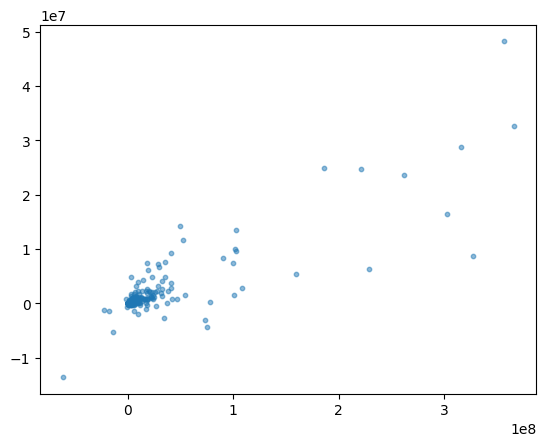

In [48]:
plt.scatter(data = data_without_outliers, x = 'cap_sources_total_07_2024', y = 'FR_2024H1_thousand_rubles', \
            s = 10, alpha = 0.5)

slope, intercept = -0.8987, -0.093
line = slope * for_clustering['cap_sources_total_07_2024'] + intercept
plt.plot(for_clustering['cap_sources_total_07_2024'], line, color='red', linewidth=0.5)

slope1, intercept1 = -0.8987, 0.4017
line1 = slope1 * for_clustering['cap_sources_total_07_2024'] + intercept1
plt.plot(for_clustering['cap_sources_total_07_2024'], line1, color='red', linewidth=0.5)

slope2, intercept2 = -0.8987, 0.7517
line2 = slope2 * for_clustering['cap_sources_total_07_2024'] + intercept2
plt.plot(for_clustering['cap_sources_total_07_2024'], line2, color='red', linewidth=0.5)

a, b = 0.78060017, -0.02828294
trend = a * for_clustering['cap_sources_total_07_2024']+b
plt.plot(for_clustering['cap_sources_total_07_2024'], trend, color='blue', linewidth=0.5)

plt.show()

###
Попробуем исследовать динамику финансовых результатов внутри каждого кластера



In [49]:
data['cluster_24'] = df['cluster_24']
data.head()

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth,cluster_23,cluster_24
0,"АКБ ""Абсолют Банк"" (ПАО)",АБСОЛЮТ БАНК,ПАО,22.04.1993,31,792060,3330563,46634535,-2538503,0,1,1
1,"ПАО АКБ ""АВАНГАРД""",АВАНГАРД,ПАО,09.06.1994,30,2319484,3815678,13954765,-1496194,0,1,1
2,"АО Банк ""Аверс""",АВЕРС,НПАО,25.09.1990,34,1883000,1510652,31302212,372348,1,1,1
3,"АО ""Авто Финанс Банк""",АВТО ФИНАНС БАНК,НПАО,26.04.1991,33,1448854,1303621,32236975,145233,1,1,1
4,"ООО ""АвтоКредитБанк""",АВТОКРЕДИТБАНК,ООО (Паевое),22.07.1992,32,66682,40254,964965,26428,1,1,1


In [50]:
data['cluster_24'].value_counts()

cluster_24
1    279
2     19
4     14
3      3
Name: count, dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   csname                     315 non-null    object
 1   cnamer                     315 non-null    object
 2   newcopf                    315 non-null    object
 3   cdreg                      315 non-null    object
 4   n_years                    315 non-null    int64 
 5   FR_2024H1_thousand_rubles  315 non-null    int64 
 6   FR_2023H1_thousand_rubles  315 non-null    int64 
 7   cap_sources_total_07_2024  315 non-null    int64 
 8   changing_FR                315 non-null    int64 
 9   cap_growth                 315 non-null    int64 
 10  cluster_23                 315 non-null    int32 
 11  cluster_24                 315 non-null    int32 
dtypes: int32(2), int64(6), object(4)
memory usage: 27.2+ KB


In [52]:
# 70% банков из первого кластера нарастили финансовый результат
data.query("cluster_24 == 1 & cap_growth == 1").cap_growth.count()/\
(data.query("cluster_24 == 1 & cap_growth == 1").cap_growth.count()+data.query("cluster_24 == 1 & cap_growth == 0").cap_growth.count())

0.6881720430107527

In [53]:
# 70% банков из второго кластера нарастили финансовый результат
data.query("cluster_24 == 2 & cap_growth == 1").cap_growth.count()/\
(data.query("cluster_24 == 2 & cap_growth == 1").cap_growth.count()+data.query("cluster_24 == 2 & cap_growth == 0").cap_growth.count())

0.7368421052631579

In [54]:
# 70% банков из третьего кластера нарастили финансовый результат
data.query("cluster_24 == 3 & cap_growth == 1").cap_growth.count()/\
(data.query("cluster_24 == 3 & cap_growth == 1").cap_growth.count()+data.query("cluster_24 == 3 & cap_growth == 0").cap_growth.count())

0.3333333333333333

In [55]:
# 70% банков из четвертого кластера нарастили финансовый результат
data.query("cluster_24 == 4 & cap_growth == 1").cap_growth.count()/\
(data.query("cluster_24 == 4 & cap_growth == 1").cap_growth.count()+data.query("cluster_24 == 4 & cap_growth == 0").cap_growth.count())

0.5714285714285714

In [56]:
for_split = data.drop(index = [9,32,47,54,103,165,181,223,171,191,216,258,290,303,26,212,283,311,64], axis = 0)

In [57]:
# Суммарное изменение финансового результата в первом кластере
a = for_split.query("cluster_24 == 1").changing_FR.sum()
a/(for_split.query("cluster_24 == 1").count()).iloc[1]

173733.36861313868

In [58]:
# Суммарное изменение финансового результата в первом кластере
b = for_split.query("cluster_24 == 2").changing_FR.sum()
b/(for_split.query("cluster_24 == 2").count()).iloc[1]

719305.2

In [59]:
# Суммарное изменение финансового результата в первом кластере
c = for_split.query("cluster_24 == 3").changing_FR.sum()
c/for_split.query("cluster_24 == 3").count().iloc[1]

-16294715.0

In [60]:
# Суммарное изменение финансового результата в первом кластере
d = for_split.query("cluster_24 == 4").changing_FR.sum()
d/for_split.query("cluster_24 == 4").count().iloc[1]

-24298961.0

In [61]:
a+b+c+d

-220783045

In [62]:
a

47602943

In [63]:
b

7193052

In [64]:
c

-32589430

In [65]:
d

-242989610

In [66]:
data.query("cluster_24 == 4").sort_values('changing_FR', ascending = True)

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth,cluster_23,cluster_24
229,ПАО Сбербанк,СБЕРБАНК РОССИИ,ПАО,20.06.1991,33,445416341,672295000,6928871769,-226878659,0,4,4
65,Банк ВТБ (ПАО),ВТБ,ПАО,17.10.1990,34,96587888,147207930,1897403976,-50620042,0,4,4
245,"ПАО ""Совкомбанк""",СОВКОМБАНК,ПАО,27.11.1990,33,24698247,62658816,398833724,-37960569,0,4,4
69,Банк ГПБ (АО),ГАЗПРОМБАНК,НПАО,23.01.1992,32,103450161,114636505,1186780568,-11186344,0,4,4
283,"ПАО Банк ""ФК Открытие""",ФК ОТКРЫТИЕ,ПАО,15.12.1992,31,32610040,37102064,366100766,-4492024,0,3,4
26,"ПАО ""Банк ""Санкт-Петербург""","БАНК ""САНКТ-ПЕТЕРБУРГ""",ПАО,03.10.1990,34,24928211,28227170,186279586,-3298959,0,3,4
29,"АО ""Банк ДОМ.РФ""",БАНК ДОМ.РФ,НПАО,23.04.1993,31,16500955,12162380,303238840,4338575,1,4,4
311,АО ЮниКредит Банк,ЮНИКРЕДИТ БАНК,НПАО,15.11.1991,33,28845547,23626430,316565501,5219117,1,3,4
204,"АО ""Райффайзенбанк""",РАЙФФАЙЗЕНБАНК,НПАО,10.06.1996,28,64837830,59157080,492181746,5680750,1,4,4
20,"АО ""АЛЬФА-БАНК""",АЛЬФА-БАНК,НПАО,03.01.1991,33,54512250,45811230,809392714,8701020,1,4,4


In [67]:
data.query("cluster_24 == 4")

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth,cluster_23,cluster_24
20,"АО ""АЛЬФА-БАНК""",АЛЬФА-БАНК,НПАО,03.01.1991,33,54512250,45811230,809392714,8701020,1,4,4
26,"ПАО ""Банк ""Санкт-Петербург""","БАНК ""САНКТ-ПЕТЕРБУРГ""",ПАО,03.10.1990,34,24928211,28227170,186279586,-3298959,0,3,4
29,"АО ""Банк ДОМ.РФ""",БАНК ДОМ.РФ,НПАО,23.04.1993,31,16500955,12162380,303238840,4338575,1,4,4
49,"АО ""БМ-Банк""",БМ-БАНК,НПАО,15.03.1994,30,23625820,9421762,261670988,14204058,1,4,4
65,Банк ВТБ (ПАО),ВТБ,ПАО,17.10.1990,34,96587888,147207930,1897403976,-50620042,0,4,4
69,Банк ГПБ (АО),ГАЗПРОМБАНК,НПАО,23.01.1992,32,103450161,114636505,1186780568,-11186344,0,4,4
199,"ПАО ""Промсвязьбанк""",ПРОМСВЯЗЬБАНК,ПАО,12.05.1995,29,96609533,56713930,669174011,39895603,1,4,4
204,"АО ""Райффайзенбанк""",РАЙФФАЙЗЕНБАНК,НПАО,10.06.1996,28,64837830,59157080,492181746,5680750,1,4,4
212,"АО ""Россельхозбанк""",РОССЕЛЬХОЗБАНК,НПАО,24.04.2000,24,48238901,21990820,357349210,26248081,1,3,4
229,ПАО Сбербанк,СБЕРБАНК РОССИИ,ПАО,20.06.1991,33,445416341,672295000,6928871769,-226878659,0,4,4


In [68]:
data.query("cluster_24 == 3").sort_values('FR_2024H1_thousand_rubles', ascending = True)

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth,cluster_23,cluster_24
210,ПАО РОСБАНК,РОСБАНК,ПАО,02.03.1993,31,6341122,23556082,228471488,-17214960,0,3,3
152,"ПАО ""МОСКОВСКИЙ КРЕДИТНЫЙ БАНК""",МОСКОВСКИЙ КРЕДИТНЫЙ БАНК,ПАО,05.08.1992,32,8640977,24015447,327095532,-15374470,0,3,3
171,"АО АКБ ""НОВИКОМБАНК""",НОВИКОМБАНК,НПАО,25.10.1993,31,13577471,6555995,102746871,7021476,1,2,3


###

Обнаружили статистически значимое влияние на выигрыш/проигрыш банков со стороны такого фактора, как ОПФ. ООО в плюсе

!!! Как интересно кластеризация объясняет две проверяемые ниже гипотезы

In [69]:
data

,csname,cnamer,newcopf,cdreg,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth,cluster_23,cluster_24
0,"АКБ ""Абсолют Банк"" (ПАО)",АБСОЛЮТ БАНК,ПАО,22.04.1993,31,792060,3330563,46634535,-2538503,0,1,1
1,"ПАО АКБ ""АВАНГАРД""",АВАНГАРД,ПАО,09.06.1994,30,2319484,3815678,13954765,-1496194,0,1,1
2,"АО Банк ""Аверс""",АВЕРС,НПАО,25.09.1990,34,1883000,1510652,31302212,372348,1,1,1
3,"АО ""Авто Финанс Банк""",АВТО ФИНАНС БАНК,НПАО,26.04.1991,33,1448854,1303621,32236975,145233,1,1,1
4,"ООО ""АвтоКредитБанк""",АВТОКРЕДИТБАНК,ООО (Паевое),22.07.1992,32,66682,40254,964965,26428,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
310,ЮГ-Инвестбанк (ПАО),ЮГ-ИНВЕСТБАНК,ПАО,05.04.1994,30,260089,93506,2617308,166583,1,1,1
311,АО ЮниКредит Банк,ЮНИКРЕДИТ БАНК,НПАО,15.11.1991,33,28845547,23626430,316565501,5219117,1,3,4
312,"АО КБ ""ЮНИСТРИМ""",ЮНИСТРИМ,НПАО,31.05.2006,18,-134830,618317,2725065,-753147,0,1,1
313,"АО ""Яндекс Банк""",ЯНДЕКС,НПАО,04.08.1994,30,-1946272,-623764,10000665,-1322508,0,1,1


In [70]:
data.query("cluster_23 == 1").cap_sources_total_07_2024.sum() / data.FR_2023H1_thousand_rubles.sum()

0.34609678590023785

In [71]:
data.query("cluster_23 == 2").cap_sources_total_07_2024.max()

108432070

In [72]:
data.query("cluster_23 == 3").cap_sources_total_07_2024.max()

366100766

In [73]:
data.query("cluster_23 == 4").cap_sources_total_07_2024.max()

6928871769

In [74]:
data.query("cluster_23 == 1").FR_2023H1_thousand_rubles.max()

12066180

In [75]:
data.query("cluster_23 == 2").FR_2023H1_thousand_rubles.max()

15156210

In [76]:
data.query("cluster_23 == 3").FR_2023H1_thousand_rubles.max()

37102064

In [77]:
data.query("cluster_23 == 4").FR_2023H1_thousand_rubles.max()

672295000

In [78]:
'''
print(data.groupby('newcopf').agg({'cap_growth':'sum'}))
print(data.groupby('newcopf').agg({'cap_growth':'count'}))
'''

"\nprint(data.groupby('newcopf').agg({'cap_growth':'sum'}))\nprint(data.groupby('newcopf').agg({'cap_growth':'count'}))\n"

In [79]:
'''
0	1
НПАО	52	125
ООО	20	65
ПАО	28	25
'''

'\n0\t1\nНПАО\t52\t125\nООО\t20\t65\nПАО\t28\t25\n'

In [80]:
# Хи-квадрат для определения связи между ДВУМЯ номинативными переменными
# (n-1)(m-1) cтепеней свободы
from scipy.stats import chi2_contingency
data_hi = [[52,125],[20,65],[28,25]] # Построчно заполняем данные их исходной (наблюдаемой!) таблицы
stat,p,dof,expected = chi2_contingency(data_hi)
stat

13.979831457798609

In [81]:
for_plot = data.pivot_table(index = 'newcopf',
                            columns = 'cluster_24',
                            values = 'csname',
                            aggfunc = 'count',
                           fill_value = 0).reset_index()
for_plot.set_index('newcopf')

cluster_24,1,2,3,4
newcopf,,,,
НПАО,155,13,1,8
ООО (Паевое),84,1,0,0
ПАО,40,5,2,6


In [82]:
for_plot = data.pivot_table(index = 'newcopf',
                            columns = 'cluster_24',
                            values = 'cap_growth',
                            aggfunc = 'sum',
                           fill_value = 0).reset_index()
for_plot.set_index('newcopf')

cluster_24,1,2,3,4
newcopf,,,,
НПАО,107,10,1,7
ООО (Паевое),64,1,0,0
ПАО,21,3,0,1


<Axes: >

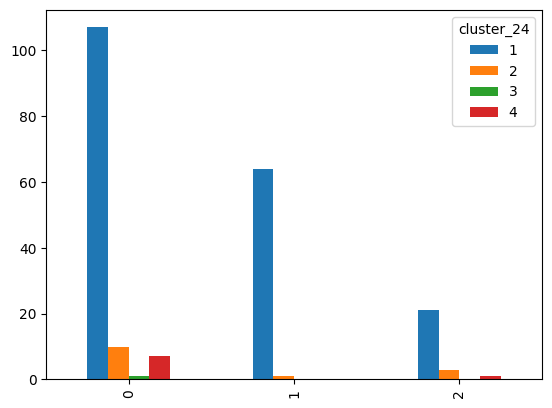

In [83]:
for_plot.plot(kind = 'bar',legend = ['НПАО','ООО','ПАО'])

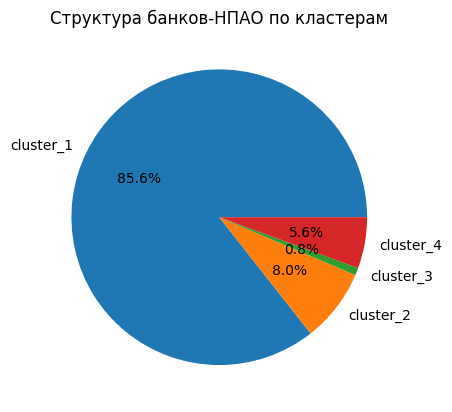

In [84]:
# НПАО 2024

labels = 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4'
sizes = [107, 10, 1, 7]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.set(title="Структура банков-НПАО по кластерам")
plt.show()

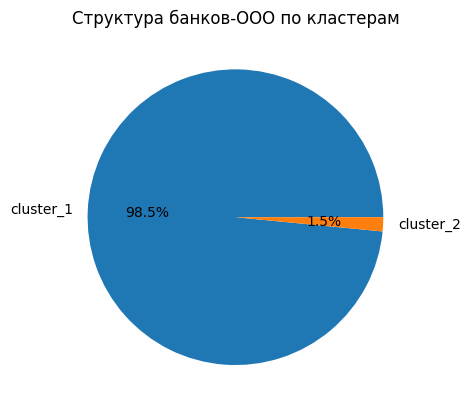

In [85]:
# ООО 2024

labels = 'cluster_1', 'cluster_2'
sizes = [64, 1]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.set(title="Структура банков-ООО по кластерам")
plt.show()

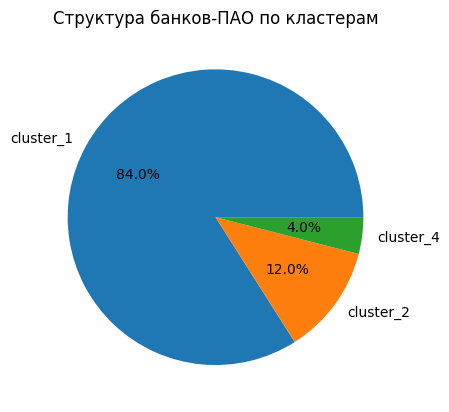

In [86]:
# ПАО 2024

labels = 'cluster_1', 'cluster_2', 'cluster_4'
sizes = [21, 3, 1]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.set(title="Структура банков-ПАО по кластерам")
plt.show()

In [87]:
pd.DataFrame(data.groupby(['newcopf','cluster_24']).count().iloc[:,0])

csname
newcopf      cluster_24        
НПАО         1              155
             2               13
             3                1
             4                8
ООО (Паевое) 1               84
             2                1
ПАО          1               40
             2                5
             3                2
             4                6

###

По формуле Стерджесса количество групп для 315 наблюдений составит 9, а размах каждой равен 3,67. Для удобства размах примем равный 4 
(в таблице есть только целые значения). Итоговое количество групп тогда составит 8.

In [88]:
33/9

3.6666666666666665

In [89]:
# 1 5 9 13 17 21 25 29 33
gr1_0 = data.query("n_years >= 1 & n_years < 6 & cap_growth == 0").count().iloc[1]
gr1_1 = data.query("n_years >= 1 & n_years < 6 & cap_growth == 1").count().iloc[1]
print('Группа 1: ',gr1_0,gr1_1)
gr2_0 = data.query("n_years >= 6 & n_years < 10 & cap_growth == 0").count().iloc[1]
gr2_1 = data.query("n_years >= 6 & n_years < 10 & cap_growth == 1").count().iloc[1]
print('Группа 2: ',gr2_0,gr2_1)
gr3_0 = data.query("n_years >= 10 & n_years < 14 & cap_growth == 0").count().iloc[1]
gr3_1 = data.query("n_years >= 10 & n_years < 14 & cap_growth == 1").count().iloc[1]
print('Группа 3: ',gr3_0,gr3_1)
gr4_0 = data.query("n_years >= 14 & n_years < 18 & cap_growth == 0").count().iloc[1]
gr4_1 = data.query("n_years >= 14 & n_years < 18 & cap_growth == 1").count().iloc[1]
print('Группа 4: ',gr4_0,gr4_1)
gr5_0 = data.query("n_years >= 18 & n_years < 22 & cap_growth == 0").count().iloc[1]
gr5_1 = data.query("n_years >= 18 & n_years < 22 & cap_growth == 1").count().iloc[1]
print('Группа 5: ',gr5_0,gr5_1)
gr6_0 = data.query("n_years >= 22 & n_years < 26 & cap_growth == 0").count().iloc[1]
gr6_1 = data.query("n_years >= 22 & n_years < 26 & cap_growth == 1").count().iloc[1]
print('Группа 6: ',gr6_0,gr6_1)
gr7_0 = data.query("n_years >= 26 & n_years < 30 & cap_growth == 0").count().iloc[1]
gr7_1 = data.query("n_years >= 26 & n_years < 30 & cap_growth == 1").count().iloc[1]
print('Группа 7: ',gr7_0,gr7_1)
gr8_0 = data.query("n_years >= 30 & n_years <= 34 & cap_growth == 0").count().iloc[1]
gr8_1 = data.query("n_years >= 30 & n_years <= 34 & cap_growth == 1").count().iloc[1]
print('Группа 8: ',gr8_0,gr8_1)

Группа 1:  0 3
Группа 2:  1 0
Группа 3:  0 6
Группа 4:  1 8
Группа 5:  3 3
Группа 6:  2 16
Группа 7:  8 25
Группа 8:  85 154


In [90]:
# Хи-квадрат для определения связи между ДВУМЯ номинативными переменными
# (n-1)(m-1) cтепеней свободы
from scipy.stats import chi2_contingency
data_hi = [[0,3],[1,0],[0,6],[1,8],[3,3],[2,16],[8,25],[85,154]] # Построчно заполняем данные их исходной (наблюдаемой!) таблицы
stat,p,dof,expected = chi2_contingency(data_hi)
expected

array([[  0.95238095,   2.04761905],
       [  0.31746032,   0.68253968],
       [  1.9047619 ,   4.0952381 ],
       [  2.85714286,   6.14285714],
       [  1.9047619 ,   4.0952381 ],
       [  5.71428571,  12.28571429],
       [ 10.47619048,  22.52380952],
       [ 75.87301587, 163.12698413]])

<Axes: xlabel='n_years', ylabel='Count'>

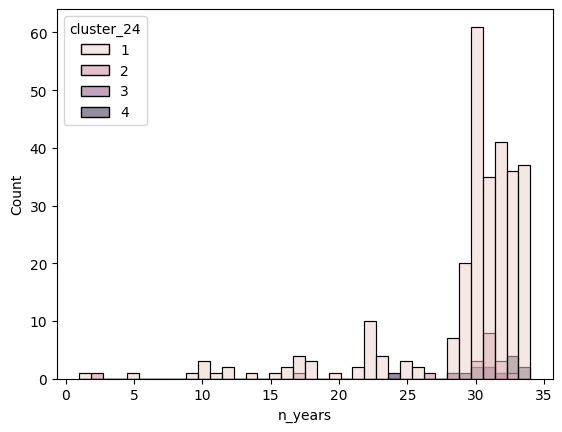

In [91]:
sns.histplot(data = data, x = data['n_years'], hue = 'cluster_24', color=['navy', 'cornflowerblue'])

### 

Выведем уравнение регрессионной прямой для 2024 года


In [92]:
for_split.describe().map(lambda x: f"{x:0.3f}")

,n_years,FR_2024H1_thousand_rubles,FR_2023H1_thousand_rubles,cap_sources_total_07_2024,changing_FR,cap_growth,cluster_23,cluster_24
count,296.000,296.000,296.000,296.000,296.000,296.000,296.000,296.000
mean,29.466,3922393.098,4668281.764,49995045.696,-745888.666,0.689,1.149,1.149
std,5.402,28151316.551,40990211.405,435242536.741,14060634.391,0.464,0.586,0.586
min,1.000,-5180656.000,-11993156.000,-1277641218.000,-226878659.000,0.000,1.000,1.000
25%,30.000,17474.500,7454.000,820777.250,-27881.250,0.000,1.000,1.000
50%,31.000,133273.000,84980.000,2617908.000,38046.000,1.000,1.000,1.000
75%,33.000,825862.250,526361.000,9959077.500,244094.500,1.000,1.000,1.000
max,34.000,445416341.000,672295000.000,6928871769.000,39895603.000,1.000,4.000,4.000


In [93]:
# 2024

def test(x, a, b):
    return a * for_split['cap_sources_total_07_2024'] + b
param, param_cov = curve_fit(test, for_split['cap_sources_total_07_2024'], for_split['FR_2024H1_thousand_rubles'])
print(param)

[6.25043547e-02 7.97485002e+05]


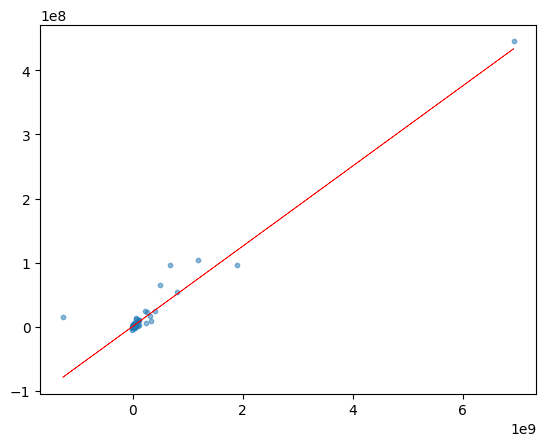

In [94]:
# 2024

plt.scatter(data = for_split, x = 'cap_sources_total_07_2024', y = 'FR_2024H1_thousand_rubles', \
            s = 10, alpha = 0.5)

a, b = 0.0625, 797485
trend = a * for_split['cap_sources_total_07_2024']+b
plt.plot(for_split['cap_sources_total_07_2024'], trend, color='red', linewidth=0.5)

plt.show()

In [95]:
# 2023

def test(x, a, b):
    return a * for_split['cap_sources_total_07_2024'] + b
param, param_cov = curve_fit(test, for_split['cap_sources_total_07_2024'], for_split['FR_2023H1_thousand_rubles'])
print(param)

[9.21083255e-02 6.33217532e+04]


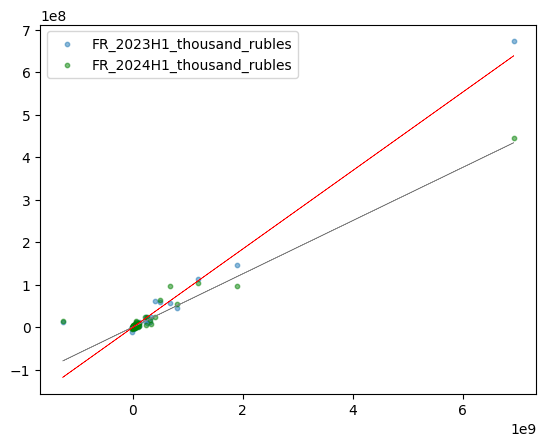

In [96]:
# 2023

plt.scatter(data = for_split, x = 'cap_sources_total_07_2024', y = 'FR_2023H1_thousand_rubles', \
            s = 10, alpha = 0.5)

plt.scatter(data = for_split, x = 'cap_sources_total_07_2024', y = 'FR_2024H1_thousand_rubles', \
            c='green',s = 10, alpha = 0.5)

a, b = 0.0625, 797485
trend = a * for_split['cap_sources_total_07_2024']+b
plt.plot(for_split['cap_sources_total_07_2024'], trend, color='gray', linewidth=0.5)

a, b = 0.0921, 63322
trend = a * for_split['cap_sources_total_07_2024']+b
plt.plot(for_split['cap_sources_total_07_2024'], trend, color='red', linewidth=0.5)

plt.legend()
plt.show()